## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-007-008-scikit-learn-01

In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn import cluster


try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    rface = face(gray=False)
    face = face(gray=True)
except ImportError:
    rface = face(gray=False)
    face = sp.face(gray=True)

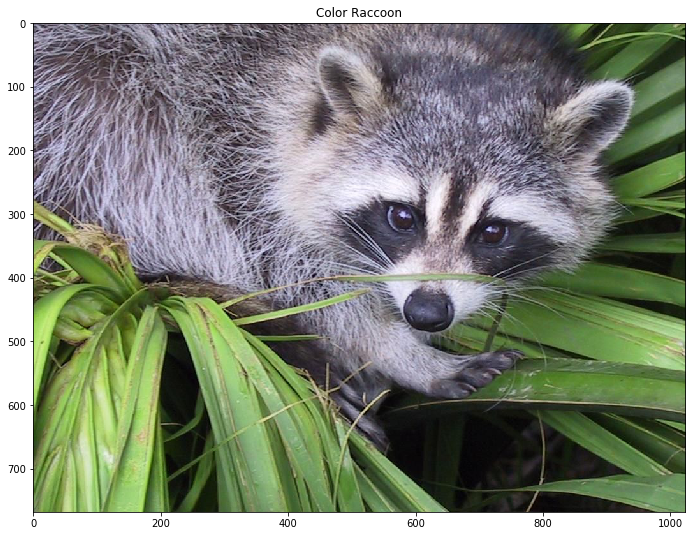

In [2]:
# original color face
rvmin = rface.min()
rvmax = rface.max()
plt.figure(1, figsize=(12, 9))
label = 'Color Raccoon'
plt.title(label, fontdict=None, loc='center')
plt.imshow(rface, vmin=rvmin, vmax=rvmax)
plt.show()

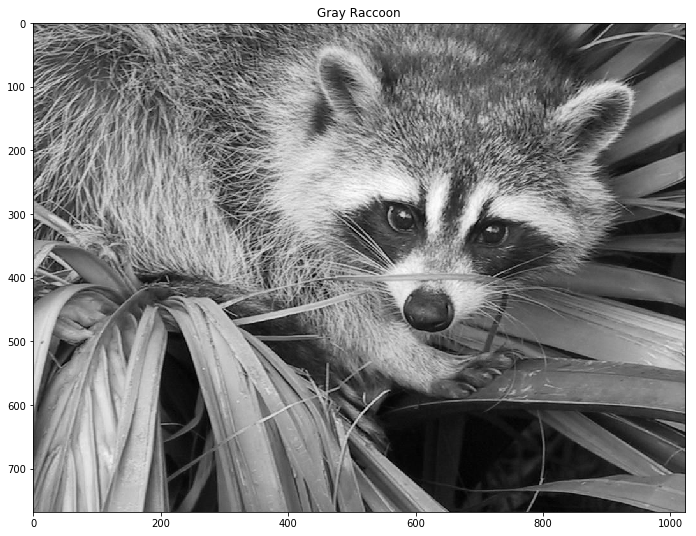

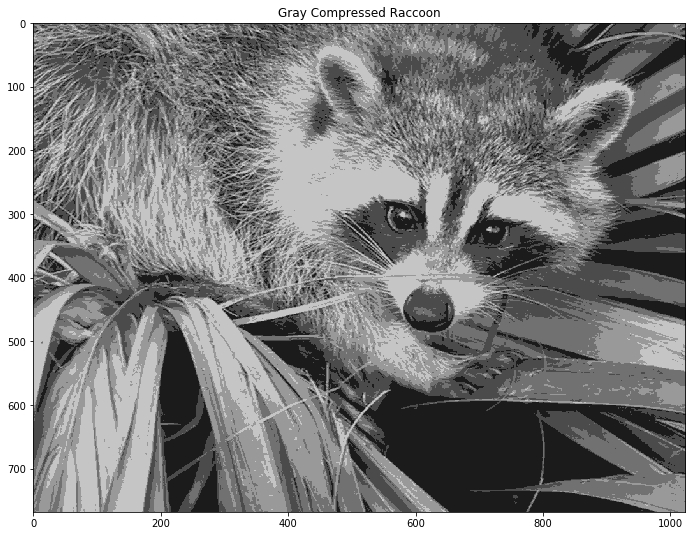

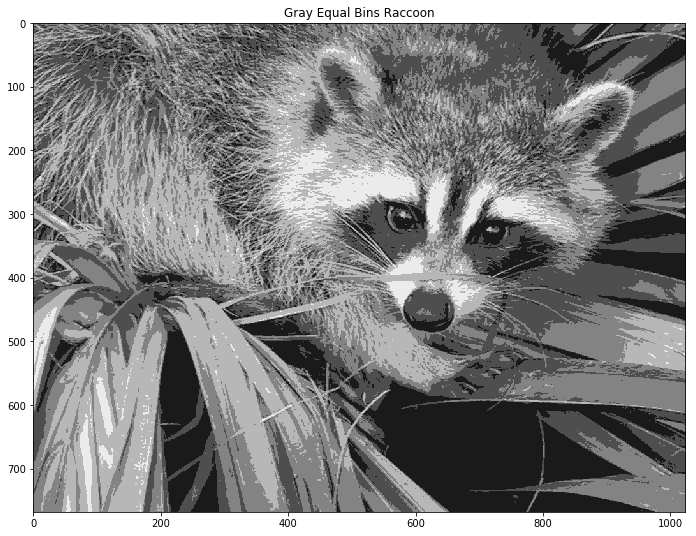

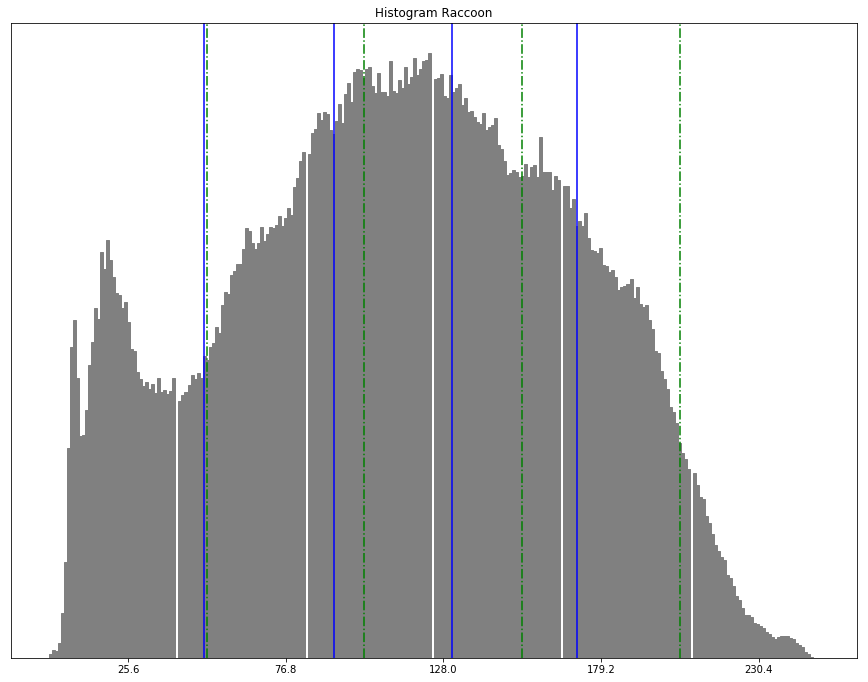

In [3]:
n_clusters = 5
np.random.seed(0)

X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

# original gray face
fig = plt.figure(1, figsize=(12, 9))
label = 'Gray Raccoon'
plt.title(label, fontdict=None, loc='center')
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

# compressed face
plt.figure(2, figsize=(12, 9))
label = 'Gray Compressed Raccoon'
plt.title(label, fontdict=None, loc='center')
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

# equal bins face
regular_values = np.linspace(0, 256, n_clusters + 1)
regular_labels = np.searchsorted(regular_values, face) - 1
regular_values = .5 * (regular_values[1:] + regular_values[:-1])  # mean
regular_face = np.choose(regular_labels.ravel(), regular_values, mode="clip")
regular_face.shape = face.shape
plt.figure(3, figsize=(12, 9))
label = 'Gray Equal Bins Raccoon'
plt.title(label, fontdict=None, loc='center')
plt.imshow(regular_face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

# histogram
plt.figure(4, figsize=(12, 9))
plt.clf()
plt.axes([.01, .01, .98, .98])
plt.hist(X, bins=256, color='0.5', edgecolor='0.5')
label = 'Histogram Raccoon'
plt.title(label, fontdict=None, loc='center')
plt.yticks(())
plt.xticks(regular_values)
values = np.sort(values)

for center_1, center_2 in zip(values[:-1], values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b')

for center_1, center_2 in zip(regular_values[:-1], regular_values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='g', linestyle='-.')

plt.show()


## Done

In [4]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-21 09:59:28.744675
